In [1]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from necro_uncal_new import model

logps0 = np.load('necro_smallest_dreamzs_5chain_logps_chain116_new20_10.npy')
logps1 = np.load('necro_smallest_dreamzs_5chain_logps_chain116_new21_10.npy')
logps2 = np.load('necro_smallest_dreamzs_5chain_logps_chain116_new22_10.npy')

# chain0 = np.load('necro_smallest_dreamzs_5chain_sampled_params_chain2620_0_50000.npy')
# chain1 = np.load('necro_smallest_dreamzs_5chain_sampled_params_chain2620_0_50000.npy')
# chain2 = np.load('necro_smallest_dreamzs_5chain_sampled_params_chain2620_0_50000.npy')

print(len(logps0))

10


In [4]:
print(logps0)

[[-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]]


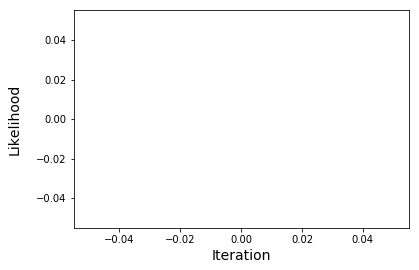

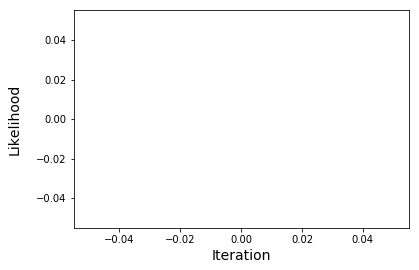

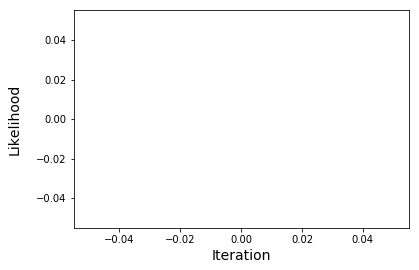

In [3]:
iters = [i for i in range(10)]

plt.figure()
# plt.subplot(152)
plt.plot(iters, logps0, color = 'red')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(153)
plt.plot(iters, logps1, color = 'k')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(154)
plt.plot(iters, logps2, color = 'g') #best
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.show()

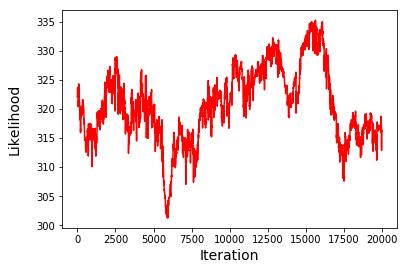

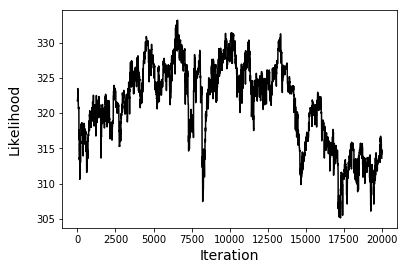

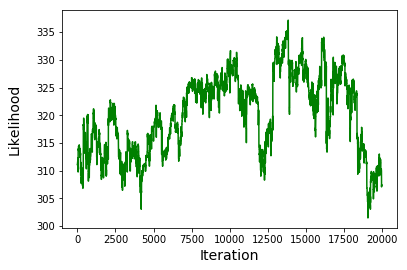

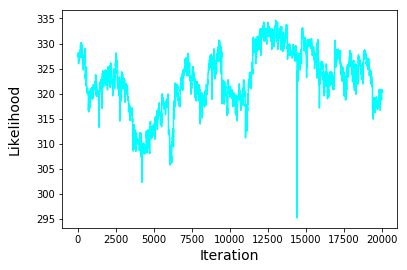

In [17]:
iters = [i for i in range(20000)]

plt.figure()
# plt.subplot(152)
plt.plot(iters, logps0, color = 'red')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(153)
plt.plot(iters, logps1, color = 'k')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(154)
plt.plot(iters, logps2, color = 'g') #best
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(155)
plt.plot(iters, logps3, color = 'cyan')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.show()

In [6]:
total_iterations = chain00.shape[0]
burnin = int(total_iterations / 2)
samples = np.concatenate((chain00[burnin:, :],chain01[burnin:, :],chain02[burnin:, :],chain03[burnin:, :]
                          ,chain04[burnin:, :],chain05[burnin:, :],chain06[burnin:, :],chain07[burnin:, :]
                         ,chain10[burnin:, :],chain11[burnin:, :],chain12[burnin:, :],chain13[burnin:, :]
                          ,chain14[burnin:, :],chain15[burnin:, :],chain16[burnin:, :],chain17[burnin:, :]
                         ,chain20[burnin:, :],chain21[burnin:, :],chain22[burnin:, :],chain23[burnin:, :]
                          ,chain24[burnin:, :],chain25[burnin:, :],chain26[burnin:, :],chain27[burnin:, :]
                         ,chain30[burnin:, :],chain31[burnin:, :],chain32[burnin:, :],chain33[burnin:, :]
                          ,chain34[burnin:, :],chain35[burnin:, :],chain36[burnin:, :],chain37[burnin:, :]))

In [ ]:
idx_pars_calibrate = [1,2,3,4,5,6,7,8,9,10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61, 62]

ndims = len(idx_pars_calibrate)
colors = sns.color_palette(n_colors=ndims)
rows = 11
columns = 6
counter = 0

# Save most likely parameter
u, indices, counts = np.unique(samples, return_index=True, return_counts=True, axis=0)
max_idx = np.argsort(counts)[::-1]
# np.save('most_likely_par_100000.npy', u[max_idx])

# plt.figure(figsize = (20,10))
f, axes = plt.subplots(rows, columns, figsize=(20,15), sharex=True)
for r in range(rows):
    for c in range(columns):
        weights = np.ones_like(samples[:, counter]) / float(len(samples[:, counter]))
        # axes[r, c].vlines(u[max_idx[:50]][:, counter], ymin=0, ymax=0.01, color='k', linestyle='solid', linewidth=0.0001)
        axes[r, c].hist(samples[:, counter], bins=25, color=colors[counter], weights=weights)
        axes[r, c].set_title(model.parameters[idx_pars_calibrate[counter]].name, fontdict={'fontsize': 8})
        # axes[r, c].set_xlim(-6, 6)
        counter += 1

        if counter > len(idx_pars_calibrate):
            break
f.add_subplot(111, frameon=False)
f.subplots_adjust(hspace=0.5)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel("Log(Parameter value)", fontsize=14)
plt.ylabel("Probability", fontsize=14, labelpad=15)
plt.savefig('pars_dist_plot_box_GI.pdf', format='pdf', bbox_inches="tight")
plt.show()

In [ ]:
print(len(model.initial_conditions))

In [ ]:
print(model.parameters)

In [ ]:
idx = list(range(0, 30,1)) #index for parameter values after initial conditions 14-50
print(len(idx))
counter = 0
# samples_nonlog = 10 ** samples
ndims = len(idx)
plt.figure(figsize=(30, 10))
for i in range(1,31):
    plt.subplot(5, 6, i)
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=logps_vals[counter], scale=scaling[counter]), color='cyan')
    sns.distplot(samples[:, counter])
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 10})
    plt.subplots_adjust(left=0.1, bottom=None, right=0.9, top=None, wspace=None, hspace=0.5)
#     plt.tight_layout()
    counter += 1
    plt.xlabel("Log(10) Value", fontsize=10)
    plt.ylabel("Probability", fontsize=9, labelpad=15)
# plt.savefig('pydream_priorpost_traceplot_earm_gi.pdf', format='pdf', bbox_inches="tight")
plt.show()

In [ ]:
idx = list(range(30, 62,1)) #index for parameter values after initial conditions 14-50
print(len(idx))
counter = 0
# samples_nonlog = 10 ** samples
ndims = len(idx)
plt.figure(figsize=(22, 25))
for i in range(31,62):
    plt.subplot(11, 6, i)
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=logps_vals[counter], scale=scaling[counter]), color='cyan')
    sns.distplot(samples[:, counter])
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 10})
    counter += 1
    plt.xlabel("Log(10) Value", fontsize=10)
    plt.ylabel("Probability", fontsize=9, labelpad=15)
# plt.savefig('pydream_priorpost_traceplot_earm_gi.pdf', format='pdf', bbox_inches="tight")
plt.show()

In [7]:
# saves the most likely parameter from the posterior distribution
u, indices, counts = np.unique(samples, return_index=True, return_counts=True, axis=0)
max_idx = np.argmax(counts)
np.save('most_likely_par_500000_earm.npy', u[max_idx])

In [10]:
best_pars = np.load('most_likely_par_500000_earm.npy')
print(best_pars)

[-7.14906457 -2.9244803  -6.22634468 -2.9049068  -8.15434345 -3.61356075
  0.10742695 -6.30877822 -2.95125045 -0.851464   -5.9956105  -2.55067795
 -7.19678775 -4.41563619 -6.35705207 -2.11975694 -4.93814558 -2.27761431
 -0.83451775 -6.78307686 -3.39784679 -7.53535046 -1.81963221 -0.96955547
 -5.00495122 -0.69122373 -0.29082581 -2.8153962  -3.75441906 -6.40309374
 -1.57281816  2.07117492 -8.78954914 -1.51834482  0.48773893 -5.46974571
 -3.04184391 -5.19578903 -5.68655634 -7.03137425 -3.28135289 -5.00935204
 -3.66072714 -7.10061651 -2.62759057 -7.21219515 -2.14179409 -6.6722587
 -1.9469892  -0.1438681  -7.5000638  -3.37314949 -0.45207765 -6.92510137
 -2.53945875 -3.4385777  -5.14971849 -3.09114121 -0.5902744  -7.52407416
 -3.65374258 -0.68030988]


In [28]:
u, indices, counts = np.unique(samples, return_index=True, return_counts=True, axis=0)

max_idx = np.argsort(counts)

print(len(max_idx))
print(len(u[46438:]))

56438
10000


In [29]:
np.save('most_likely_par_100000.npy', u[46438:])

In [30]:
best_pars = np.load('most_likely_par_100000.npy')
print(best_pars)

[[-5.26075992 -1.50905796 -4.79516433 ... -6.69284316 -2.29947895
   0.51237038]
 [-5.26075992 -1.50905796 -4.79516433 ... -6.69284316 -2.29947895
   0.51237038]
 [-5.26064598 -3.34284545 -5.77567359 ... -6.7980972  -2.0360001
  -1.42490802]
 ...
 [-2.68430016 -2.06116951 -5.48140222 ... -7.32489384 -1.87707593
   1.34457671]
 [-2.68125939 -2.428944   -5.82667395 ... -7.41447406 -3.13645334
   1.03749785]
 [-2.68125939 -2.428944   -5.82667395 ... -7.41447406 -3.122628
   1.03749785]]
